In [17]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def get_tuple(data_dict):  # 得到所有三元组
    
    tuple_collector = []
    for data_subset in data_dict.values():
        for data in data_subset:
            tuple_collector.append(tuple(data[0]))
    
    return tuple_collector

In [3]:
with open('../datas/knowledge/graph.pkl', 'rb') as f:
    all_data = pickle.load(f)
    
tuple_dataset = get_tuple(all_data)

In [4]:
# 构建图
DG = nx.DiGraph()
for tp in tuple_dataset:
    DG.add_edge(tp[0], tp[2], relation=tp[1])

In [82]:
# 构建子图
edge_label_dict = {}
subDG = nx.subgraph(DG, list(DG.nodes)[:3000])
for edge in subDG.edges:
    if DG[edge[0]][edge[1]]['relation']:
        edge_label_dict[(edge[0], edge[1])] = DG[edge[0]][edge[1]]['relation']

/home/cbw233/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27801 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/cbw233/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21457 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/cbw233/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 30332 missing from current font.
  font.set_text(s, 0, flags=flags)


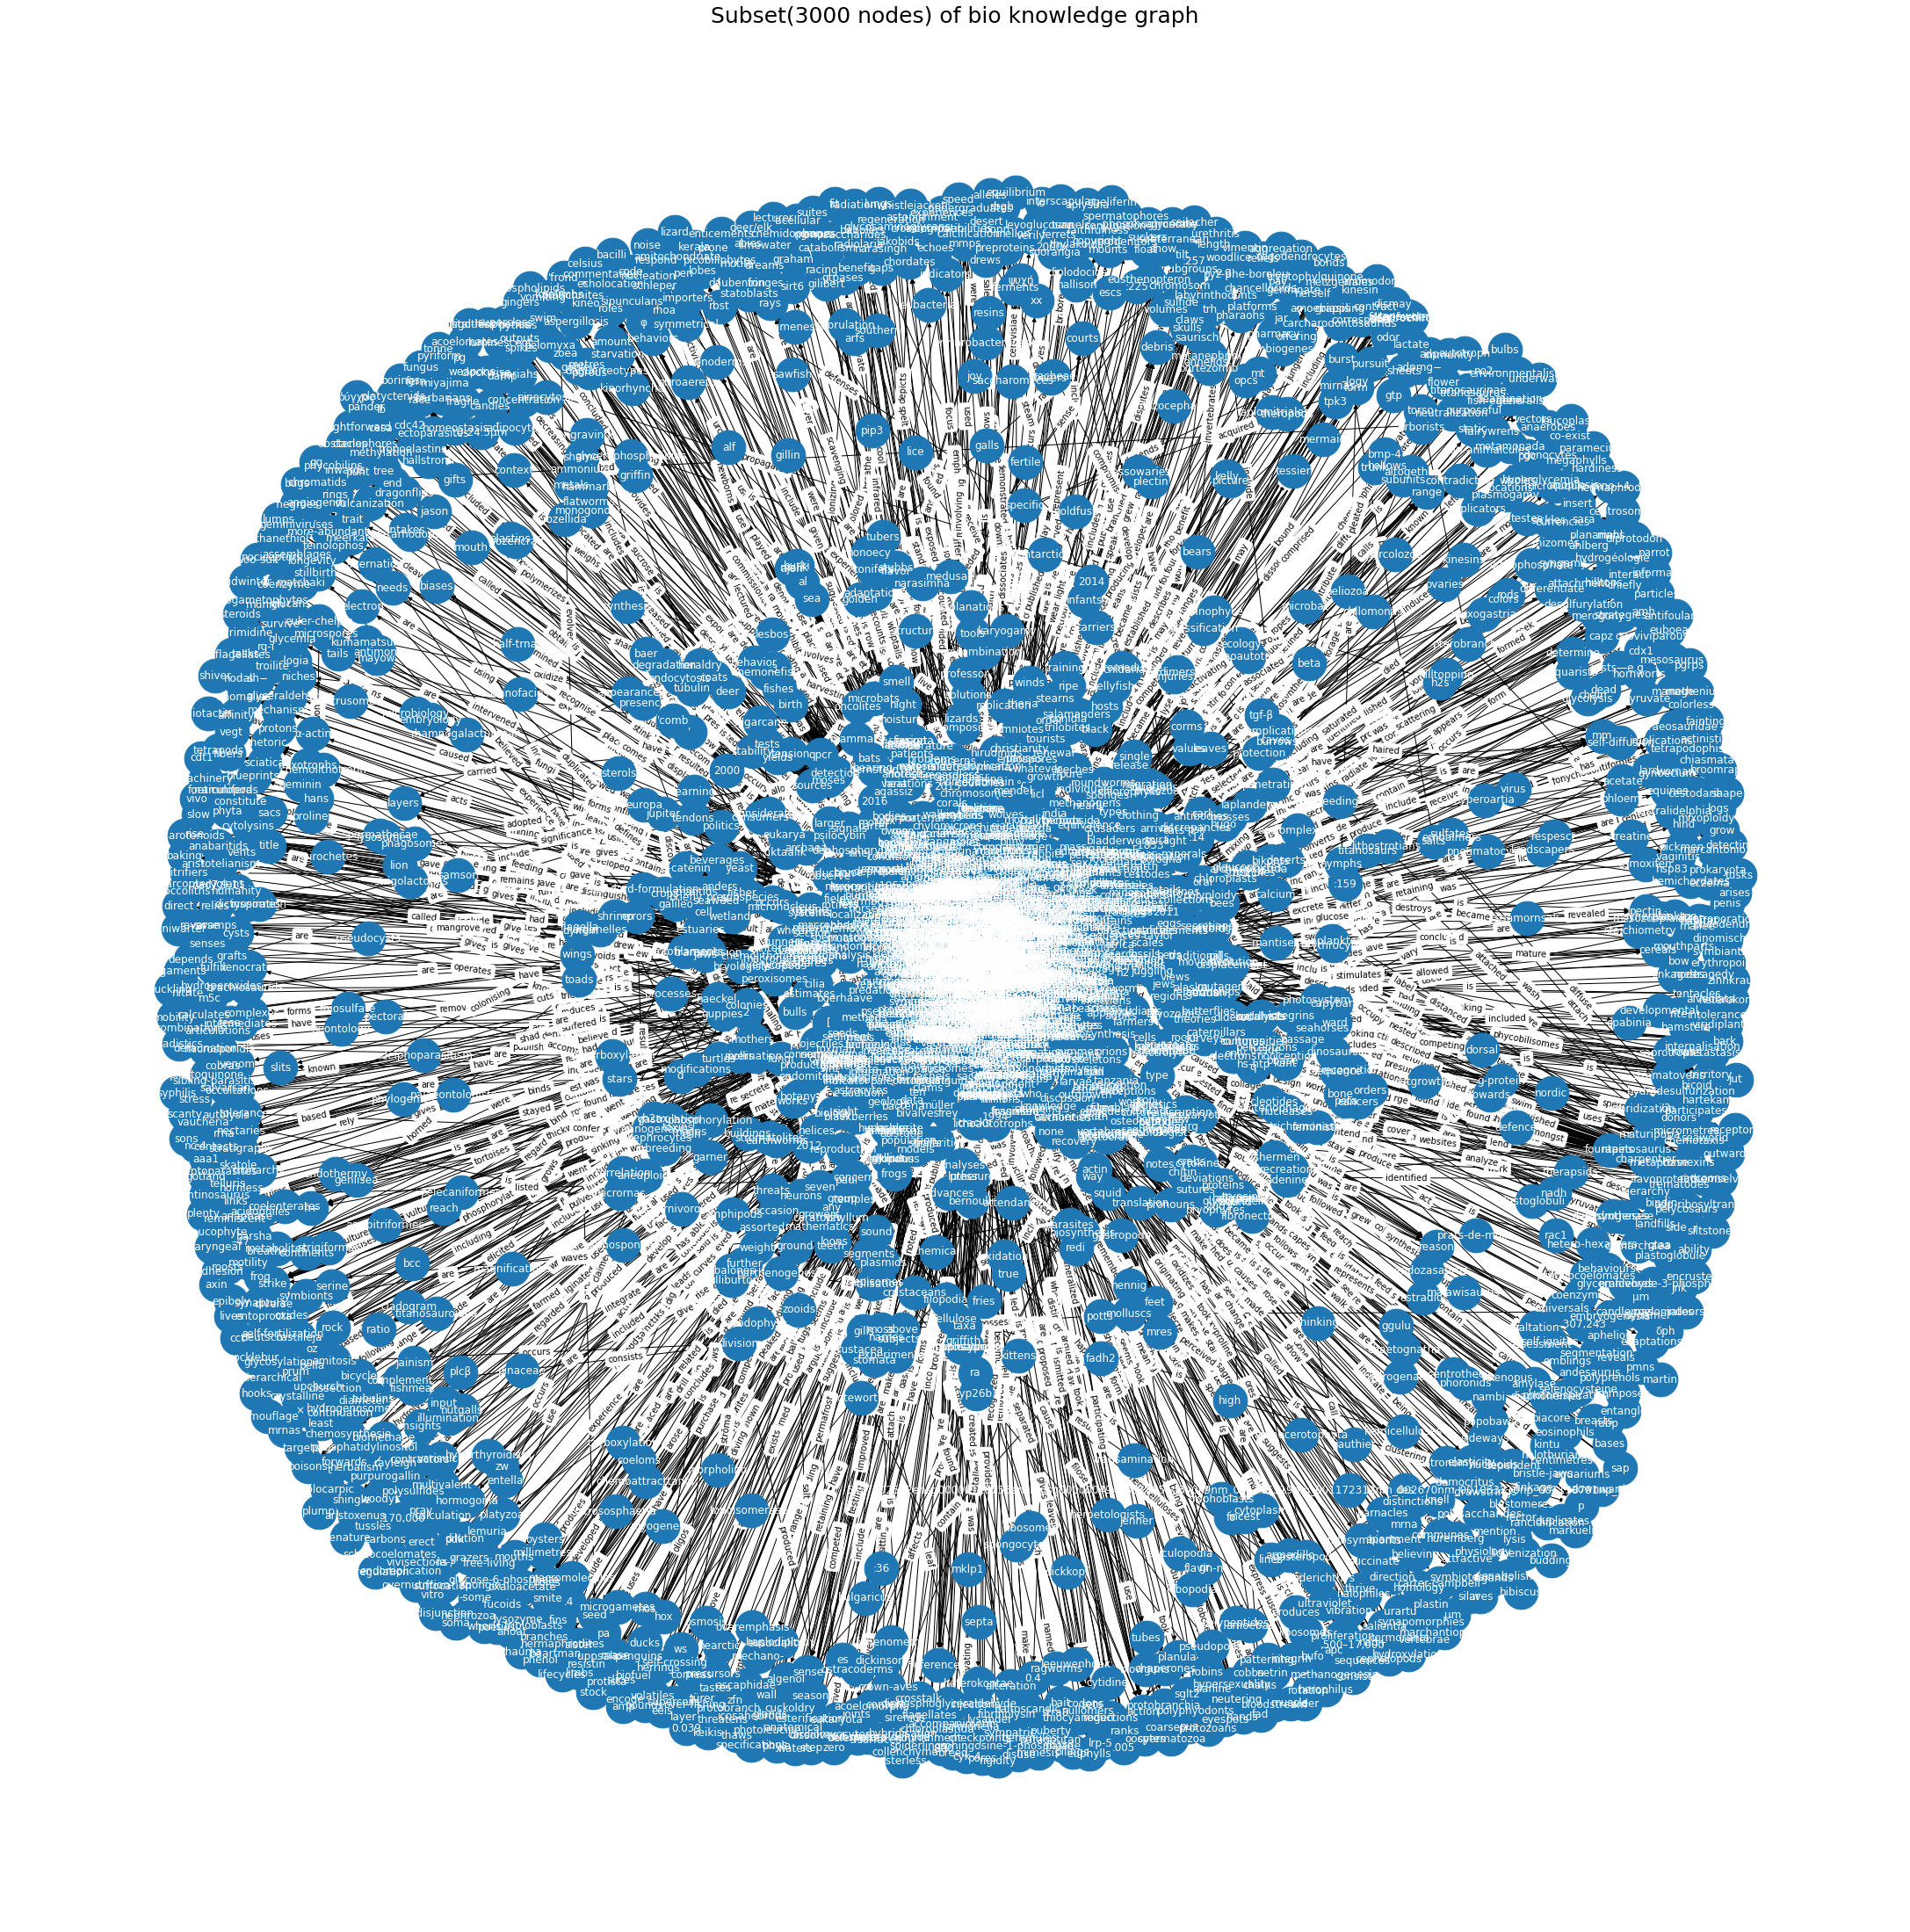

In [84]:
# 打印
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(subDG)
nx.draw(subDG, pos, with_labels=True,  node_size=1500, font_color='white')
nx.draw_networkx_edge_labels(subDG, pos, edge_color='black',edge_width=20,
                             edge_labels=edge_label_dict)
plt.title("Subset(3000 nodes) of bio knowledge graph", fontsize=25)
plt.savefig("../datas/knowledge/graph.png")